In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

from tqdm import tqdm
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import random

import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-27846twd because the default path (/home/nlapid/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df_train = pd.read_csv('jpeg-happywhale-384x384/train.csv')

In [3]:
df_train['species'].replace({"globis": "short_finned_pilot_whale",
                             "pilot_whale": "short_finned_pilot_whale",
                             "kiler_whale": "killer_whale",
                             "bottlenose_dolpin": "bottlenose_dolphin"},
                            inplace=True)

In [25]:
df_train.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [6]:
df_train['species'].value_counts().sort_index()

beluga                        7443
blue_whale                    4830
bottlenose_dolphin           10781
brydes_whale                   154
commersons_dolphin              90
common_dolphin                 347
cuviers_beaked_whale           341
dusky_dolphin                 3139
false_killer_whale            3326
fin_whale                     1324
frasiers_dolphin                14
gray_whale                    1123
humpback_whale                7392
killer_whale                  2455
long_finned_pilot_whale        238
melon_headed_whale            1689
minke_whale                   1608
pantropic_spotted_dolphin      145
pygmy_killer_whale              76
rough_toothed_dolphin           60
sei_whale                      428
short_finned_pilot_whale       745
southern_right_whale           866
spinner_dolphin               1700
spotted_dolphin                490
white_sided_dolphin            229
Name: species, dtype: int64

In [22]:
sum(df_train['species'].value_counts(normalize=True)**2)*1.25

0.13919904965824123

In [23]:
train_val_count.sum()

51033

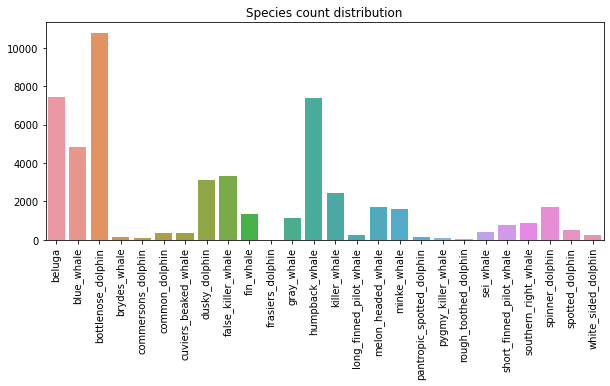

In [32]:
train_val_count = df_train['species'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 4))

chart = sns.barplot(x=train_val_count.index, y=train_val_count.values, ax=ax)
# ax.set_xlabel('species')
ax.set_title('Species count distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [27]:
train_ind_count = df_train.groupby('species')['individual_id'].nunique()
train_ind_count

species
beluga                       1012
blue_whale                   2348
bottlenose_dolphin            904
brydes_whale                   44
commersons_dolphin             70
common_dolphin                 38
cuviers_beaked_whale          183
dusky_dolphin                2731
false_killer_whale            196
fin_whale                     466
frasiers_dolphin               13
gray_whale                    185
humpback_whale               2679
killer_whale                  472
long_finned_pilot_whale       131
melon_headed_whale           1323
minke_whale                   128
pantropic_spotted_dolphin      44
pygmy_killer_whale             24
rough_toothed_dolphin          46
sei_whale                     197
short_finned_pilot_whale      458
southern_right_whale          549
spinner_dolphin               891
spotted_dolphin               280
white_sided_dolphin           175
Name: individual_id, dtype: int64

In [28]:
train_ind_count.sum()

15587

In [26]:
sum(df_train['individual_id'].value_counts(normalize=True)**2)*1.25

0.0007192155276075942

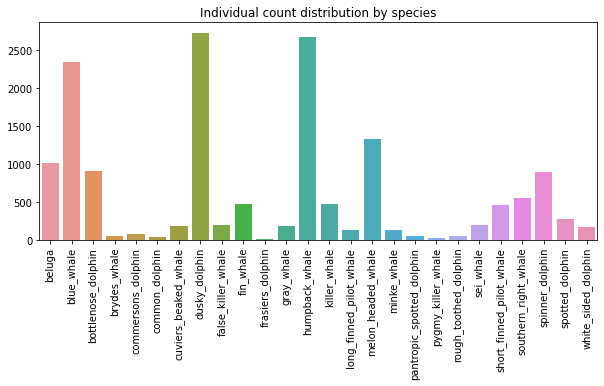

In [33]:
train_ind_count = df_train.groupby('species')['individual_id'].nunique()

fig, ax = plt.subplots(figsize=(10, 4))

chart = sns.barplot(x=train_ind_count.index, y=train_ind_count.values, ax=ax)
ax.set_xlabel(None)
ax.set_title('Individual count distribution by species')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()